<a href="https://colab.research.google.com/github/roboberto1403/modelo_regressao_simples/blob/main/regressao_precos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados

 Importação das bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Importando e visualizando os dados

In [5]:
resi = pd.read_csv("teste_indicium_precificacao.csv", sep=",")
resi.shape

(48894, 16)

In [ ]:
resi.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Coluna Bairro: percebe-se que existem diversos valores possíveis, tornando essa coluna não muito interessante ao modelo pela maldição da dimensionalidade

In [ ]:
agrupado = resi.groupby(['bairro']).size()
agrupado

,0
bairro,
Allerton,42
Arden Heights,4
Arrochar,21
Arverne,77
Astoria,900
...,...
Windsor Terrace,157
Woodhaven,88
Woodlawn,11


Grupo de bairro parece ser uma coluna melhor pelas poucas possibilidades

In [ ]:
agrupado = resi.groupby(['bairro_group']).size()
agrupado

,0
bairro_group,
Bronx,1091
Brooklyn,20103
Manhattan,21661
Queens,5666
Staten Island,373


Grupo de Bairro vs Preços, percebe-se os preços mais elevados em Manhattan

<ipython-input-15-d01bdcd7e3f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  srn.barplot(x='bairro_group', y='price', data=grouped_data, palette='viridis', width=0.4)


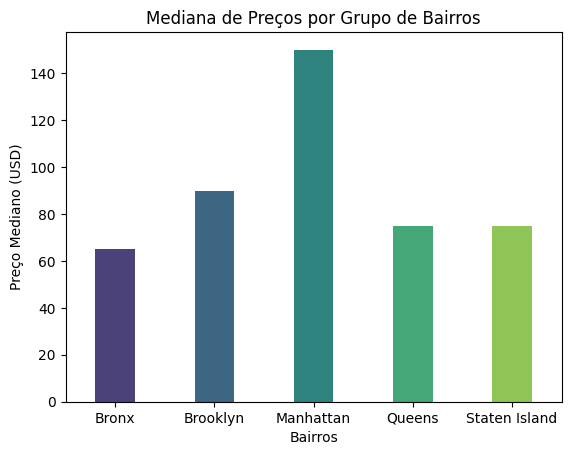

In [ ]:
grouped_data = resi.groupby('bairro_group')['price'].median().reset_index()
srn.barplot(x='bairro_group', y='price', data=grouped_data, palette='viridis', width=0.4)
plt.title('Mediana de Preços por Grupo de Bairros')
plt.xlabel('Bairros')
plt.ylabel('Preço Mediano (USD)')
plt.show()

Quão povoado de aluguéis é cada bairro, sendo Manhattan também o mais povoado


<ipython-input-16-7cd1a156d3f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  srn.barplot(x='bairro_group', y='rent_count', data=rents_per_neighborhood, palette='viridis', width=0.4)


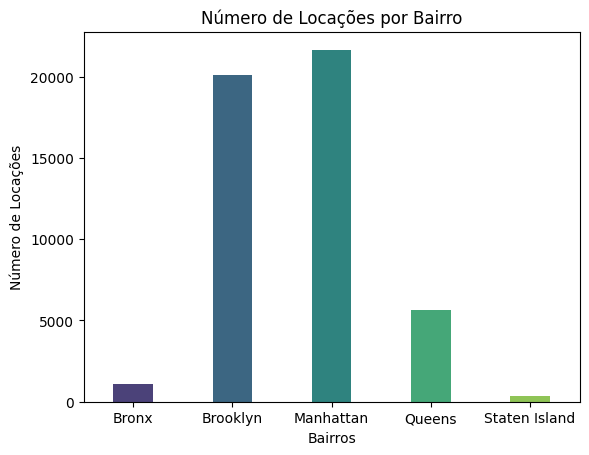

In [ ]:
rents_per_neighborhood = resi.groupby('bairro_group').size().reset_index(name='rent_count')
srn.barplot(x='bairro_group', y='rent_count', data=rents_per_neighborhood, palette='viridis', width=0.4)
plt.title('Número de Locações por Bairro')
plt.xlabel('Bairros')
plt.ylabel('Número de Locações')
plt.show()

Coluna mínimo de noites

In [ ]:
resi['minimo_noites'].describe()

,minimo_noites
count,48894.000000
mean,7.030085
std,20.510741
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


Entendendo a relação entre essa coluna com os preços

<ipython-input-18-c28ee9d37a4b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  srn.barplot(data=resi, x=pd.cut(resi['minimo_noites'], bins=bins, labels=labels, right=False), y='price', estimator=np.median, palette='viridis')


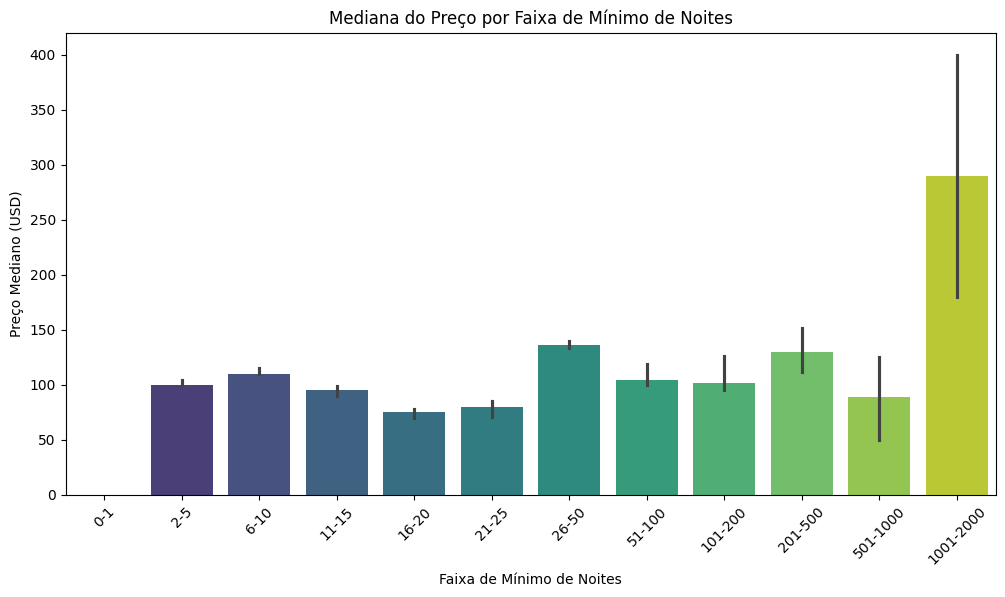

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import numpy as np

# Definição dos bins e labels para mínimo de noites
bins = [0, 1, 5, 10, 15, 20, 25, 50, 100, 200, 500, 1000, 2000]
labels = ['0-1', '2-5', '6-10', '11-15', '16-20', '21-25', '26-50', '51-100', '101-200', '201-500', '501-1000', '1001-2000']

# Criar um gráfico de barras mostrando a mediana do preço por faixa de mínimo de noites
plt.figure(figsize=(12, 6))
srn.barplot(data=resi, x=pd.cut(resi['minimo_noites'], bins=bins, labels=labels, right=False), y='price', estimator=np.median, palette='viridis')
plt.title('Mediana do Preço por Faixa de Mínimo de Noites')
plt.xlabel('Faixa de Mínimo de Noites')
plt.ylabel('Preço Mediano (USD)')
plt.xticks(rotation=45)
plt.show()

Coluna número de reviews

In [ ]:
resi['numero_de_reviews'].describe()

,numero_de_reviews
count,48894.000000
mean,23.274758
std,44.550991
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


### HIPÓTESE: Mais reviews justificam ou estão relacionadas a maiores preços (reprovada, justamente o contrário)


<ipython-input-20-f7a802f50f8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  srn.barplot(data=resi, x=pd.cut(resi['numero_de_reviews'], bins=bins, labels=labels, right=False), y='price', palette='viridis', width=0.4)


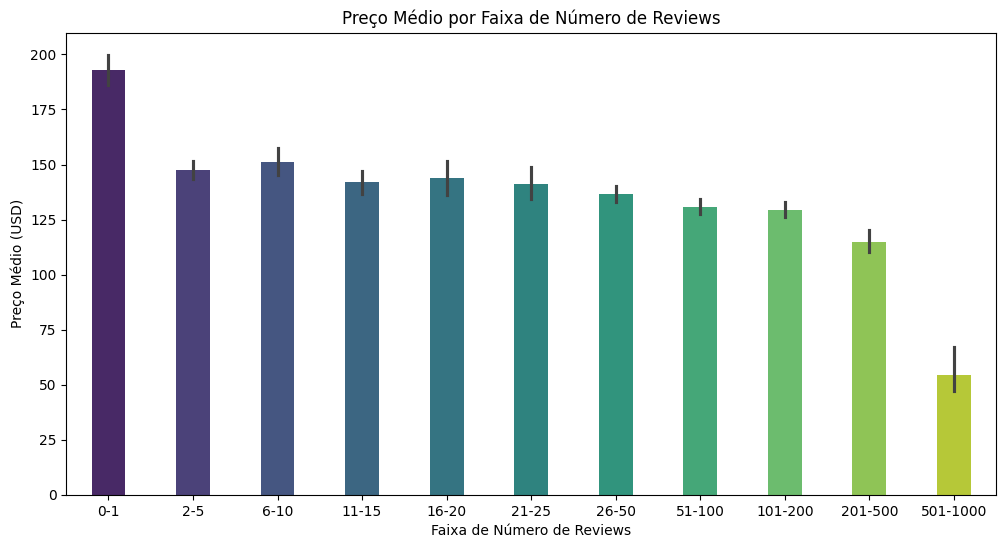

In [ ]:
# Intervalos para número de reviews (faixas mais finas para 0-24)
# Definição dos bins e labels para número de reviews
bins = [0, 1, 5, 10, 15, 20, 25, 50, 100, 200, 500, 1000]
labels = ['0-1', '2-5', '6-10', '11-15', '16-20', '21-25', '26-50', '51-100', '101-200', '201-500', '501-1000']

# Criar um gráfico de barras mostrando a mediana do preço por faixa de número de reviews
plt.figure(figsize=(12, 6))
srn.barplot(data=resi, x=pd.cut(resi['numero_de_reviews'], bins=bins, labels=labels, right=False), y='price', palette='viridis', width=0.4)
plt.title('Preço Médio por Faixa de Número de Reviews')
plt.xlabel('Faixa de Número de Reviews')
plt.ylabel('Preço Médio (USD)')
plt.show()

Coluna tipo de quarto

In [ ]:
resi['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Entendendo a relação desse coluna com o preço, sendo o tipo de "quarto/apartamento inteiro" vastamente mais valorado

<ipython-input-22-ec24a529f108>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  srn.barplot(x=preco_por_tipo.index, y=preco_por_tipo.values, palette='viridis', width=0.4)


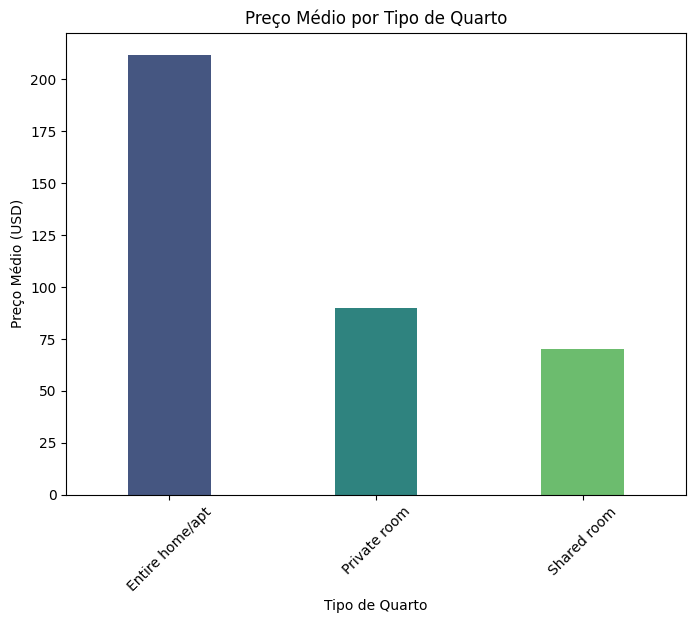

In [ ]:
# Preço médio por tipo de quarto
preco_por_tipo = resi.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Criando o gráfico com seaborn
plt.figure(figsize=(8, 6))
srn.barplot(x=preco_por_tipo.index, y=preco_por_tipo.values, palette='viridis', width=0.4)

# Personalização do gráfico
plt.title('Preço Médio por Tipo de Quarto')
plt.ylabel('Preço Médio (USD)')
plt.xlabel('Tipo de Quarto')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

Entendo a relação entre palavras chaves nos nomes das residências e o preço

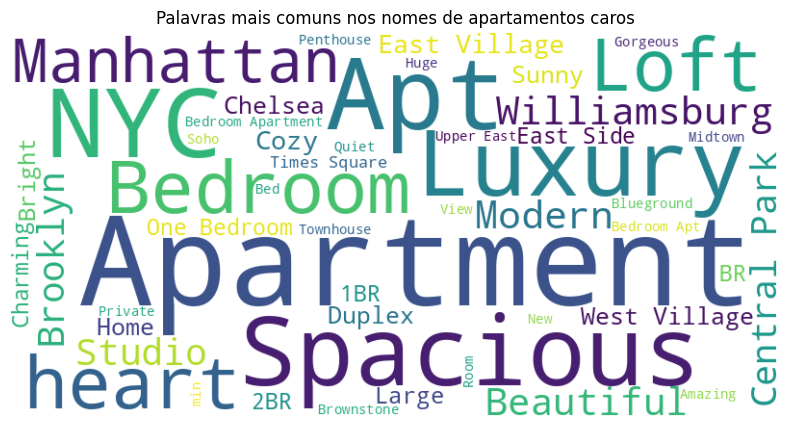

In [ ]:
from wordcloud import WordCloud
# Filtrar os apartamentos de alto valor
apartamentos_caro = resi[resi['price'] > resi['price'].quantile(0.75)]

# Juntar todos os nomes em um único texto
texto = ' '.join(apartamentos_caro['nome'].dropna())

# Gerar a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(texto)

# Visualizar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais comuns nos nomes de apartamentos caros')
plt.show()

# Limpeza e Tratamento dos Dados

Valores null em nome, host_name, ultima_review e reviews_por_mes

In [ ]:
resi.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Filtrar as linhas em que 'reviews_por_mes' é NaN e 'numero_de_reviews' não é zero
filtro = resi[resi['reviews_por_mes'].isna() & (resi['numero_de_reviews'] != 0)]

# Verificar se existem linhas que atendem a essa condição
filtro.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [ ]:
#substituir NAN por 0
resi.fillna({'reviews_por_mes': 0}, inplace=True)

In [ ]:
#Verificamos se NAN não existem mais
resi['reviews_por_mes'].isnull().sum()

0

In [ ]:
#Verificamos se existe algum valor da coluna de disponibilidade 365 que está fora do alcance
resi.loc[(resi['disponibilidade_365'] <  0 )  | ( resi['disponibilidade_365'] >  365) ]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [ ]:
#dados duplicados, buscando pelo id
resi[resi.duplicated(['id'],keep=False)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


In [ ]:
#Procurando por residência sem preço
mais_baratas = resi.sort_values(by='price', ascending=True).head(10)
mais_baratas

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
26258,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,0.00,1,0
26865,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


Algumas residências com valor 0, o que não faz sentido e deve ser um erro

In [ ]:
resi = resi[resi['price'] > 0]

In [ ]:
resi.shape

(48883, 16)

#Preparando os dados

In [6]:
df = pd.read_csv("teste_indicium_precificacao.csv")

In [7]:
df.drop(columns=['host_name', 'host_id', 'ultima_review', 'nome', 'bairro'], inplace=True)
df = df[df['price'] > 0]
df.dropna(inplace=True)
df['reviews_por_mes'].fillna(0, inplace=True)
df = pd.concat([df, pd.get_dummies(df[['room_type', 'bairro_group']])], axis=1)
df.drop(columns=['room_type', 'bairro_group'], inplace=True)
df

<ipython-input-7-130b6ffa76b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-7-130b6ffa76b6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_por_mes'].fillna(0, inplace=True)
<ipython-input-7-130b6ffa76b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,40.75362,-73.98377,225,1,45,0.38,2,355,True,False,False,False,False,True,False,False
2,3831,40.68514,-73.95976,89,1,270,4.64,1,194,True,False,False,False,True,False,False,False
3,5022,40.79851,-73.94399,80,10,9,0.10,1,0,True,False,False,False,False,True,False,False
4,5099,40.74767,-73.97500,200,3,74,0.59,1,129,True,False,False,False,False,True,False,False
5,5121,40.68688,-73.95596,60,45,49,0.40,1,0,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,36425863,40.78099,-73.95366,129,1,1,1.00,1,147,False,True,False,False,False,True,False,False
48789,36427429,40.75104,-73.81459,45,1,1,1.00,6,339,False,True,False,False,False,False,True,False
48798,36438336,40.54179,-74.14275,235,1,1,1.00,1,87,False,True,False,False,False,False,False,True
48804,36442252,40.80787,-73.92400,100,1,2,2.00,1,40,True,False,False,True,False,False,False,False


Normalização por loratítmo


In [8]:
df["minimo_noites"] = np.log(df["minimo_noites"])
df["numero_de_reviews"] = np.log(df["numero_de_reviews"])
df["reviews_por_mes"] = np.log(df["reviews_por_mes"])
df["calculado_host_listings_count"] = np.log(df["calculado_host_listings_count"])
df["price"] = np.log(df["price"])

Foram selecionadas todas as features excluindo as que não fazem sentido (nome de host, ultima review, etc) ou aquelas redundantes (bairro).

Técnicas de engenharia de funcionalidade foram testadas durante o desenvolvimento como:
* Criação de uma coluna para identificação de pontos de interesse num raio estabelecido baseado nas coordenadas de cada residência;
* Criação de colunas de presença de palavras chaves dos títulos das residências (coluna nome).

Porém, após testes, foi decidido não seguir em frente pela insignificância dos benefícios.

Técnicas de remoção de outliers também foram testadas mas descartadas pelos mesmos motivos.

In [9]:
previsores = df.iloc[:, [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].values
classe = df.iloc[:,3].values
previsores

array([[40.75362, -73.98377, 0.0, ..., True, False, False],
       [40.68514, -73.95976, 0.0, ..., False, False, False],
       [40.79851, -73.94399, 2.3025850929940455, ..., True, False, False],
       ...,
       [40.54179, -74.14275, 0.0, ..., False, False, True],
       [40.80787, -73.924, 0.0, ..., False, False, False],
       [40.69805, -73.92801, 0.0, ..., False, False, False]], dtype=object)

### Divisão da base de dados entre treinamento e teste. Usamos 20% para testar e 80% para treinar. Random_state = 42 para sempre obter a mesma divisão da base quando o código for executado


In [10]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.2,
                                                              random_state = 42)

Foram escolhidos dois grupos de modelos para os testes: Ensemble-Based Learning e GBDT (Gradient Boosting Decision Trees). O Ensemble-Based Learning, como o Random Forest, combina múltiplas árvores de decisão para aumentar a robustez e reduzir a variância. Já o GBDT, representado por modelos como CatBoost, melhora iterativamente os erros das árvores anteriores, otimizando a performance. Foram testados também ExtraTrees, XGBoost e LightGBM, mas Random Forest e CatBoost apresentaram o melhor desempenho em seus grupos. Pela sua superioridade em precisão e generalização, foram os escolhidos para os testes finais.

In [ ]:
# Criação e treinamento do modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rf = RandomForestRegressor()
rf.fit(X_treinamento, y_treinamento)

# Obtenção das previsões
previsoes = rf.predict(X_teste)

# Avaliação
mae_rf = mean_absolute_error(y_teste, previsoes)
mse_rf = mean_squared_error(y_teste, previsoes)
r2_rf = r2_score(y_teste, previsoes)
rmse_rf = np.sqrt(mse_rf)

print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")

MAE: 0.29130264752905044
MSE: 0.16461633771999734
RMSE: 0.4057293897661314
R²: 0.625168500360001


Parâmetros escolhidos a partir de rodadas de RandomSearchGrid e testes manuais

In [12]:
# Treinamento do modelo CatBoost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

cat_model = CatBoostRegressor(
    iterations=1600,
    learning_rate=0.025,
    depth=9,
    l2_leaf_reg=1,
    random_strength=0.8,
    bagging_temperature=0.15,
    random_state=42,
    verbose=0
)

# Treinando o modelo
cat_model.fit(X_treinamento, y_treinamento)

# Fazendo previsões
y_pred_cat = cat_model.predict(X_teste)

# Avaliação
mae_cat = mean_absolute_error(y_teste, y_pred_cat)
mse_cat = mean_squared_error(y_teste, y_pred_cat)
rmse_cat = mse_cat ** 0.5
r2_cat = r2_score(y_teste, y_pred_cat)

print(f"MAE: {mae_cat}")
print(f"MSE: {mse_cat}")
print(f"RMSE: {rmse_cat}")
print(f"R²: {r2_cat}")

MAE: 0.28614156787890843
MSE: 0.1580637714567008
RMSE: 0.39757234744974507
R²: 0.6400886976683605


In [13]:
# Exportando o modelo escolhido (CatBoost)
from joblib import dump

dump(cat_model, 'modelo_regressao_precos.pkl')

['modelo_regressao_precos.pkl']

In [14]:
#Importando e utilizando o modelo escolhido

from joblib import load

modelo = load('modelo_regressao_precos.pkl')

In [15]:
#Dado desconhecido para teste
input = {
    'id': [2595],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'minimo_noites':[1],
    'numero_de_reviews':[45],
    'reviews_por_mes':[0.38],
    'calculado_host_listings_count':[0.38],
    'disponibilidade_365':[355],
    'room_type_Entire home/apt': [True],
    'room_type_Private room':[False],
    'room_type_Shared room':[False],
    'bairro_group_Bronx':[False],
    'bairro_group_Brooklyn':[False],
    'bairro_group_Manhattan':[True],
    'bairro_group_Queens':[False],
    'bairro_group_Staten Island':[False]
}

input = pd.DataFrame(input)
input

,id,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,40.75362,-73.98377,1,45,0.38,0.38,355,True,False,False,False,False,True,False,False


In [16]:
#Resultado do modelo no novo input
predicao = modelo.predict(input)
preco_final = np.round(np.exp(predicao),2)

print("Preço Sugerido com Base no Modelo (em $): ", preco_final)

Preço Sugerido com Base no Modelo (em $):  [111.22]
